<a href="https://colab.research.google.com/github/JoseMartinezSegura/Analisis_Dataset_Titanic/blob/main/Analisis_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis DatSet Titanic 🚢

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Exploración del DataSet

Análisis de los Nulos
* Lo primero es hacer un análisis de los nulos
* Tendremos que hacer un recuento de los nulos en las columnas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Ruta de Archivo '/content/drive/MyDrive/Colab Notebooks/Datasets/Datos_Titanic.csv'

df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Datasets/Datos_Titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
# Devolvera valore booleanos
df.notnull().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,False,True


In [ ]:
# Sumatorio de no nulos
df.notnull().sum()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [ ]:
# Sumatorio de los nulos
total = df.isnull().sum().sort_values(ascending = False)
total

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
part = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
part

Cabin          0.782297
Age            0.205742
Fare           0.002392
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.000000
dtype: float64

In [ ]:
# Totales y de porcentajes de valores nulos
datos_faltantes = pd.concat([total, part], axis = 1, keys = ['Total','% Faltantes'])
datos_faltantes

,Total,% Faltantes
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [ ]:
# Columna Cabin fue elimina debido a que cuenta con muchos valores nulos
df.drop('Cabin', axis = 1, inplace = True )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [ ]:
max_age = df['Age'].max()
max_age

76.0

In [ ]:
prom_age = df['Age'].mean()
prom_age

30.272590361445783

In [ ]:
value = 30
df['Age'].fillna(30, inplace = True)
df['Age'].max()

76.0

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
total

Fare           1
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [ ]:
# Eliminamos la filas en null de la columan Fare
df.drop(df[pd.isnull(df['Fare'])].index, inplace=True)

In [ ]:
df.notnull().sum()

PassengerId    417
Survived       417
Pclass         417
Name           417
Sex            417
Age            417
SibSp          417
Parch          417
Ticket         417
Fare           417
Embarked       417
dtype: int64

In [ ]:
# Para estadisticas descriptivas vemos los números. Muestra variables cuantitativas.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.143885,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.562546,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Dimensiones del DF
df.shape

(417, 11)

In [ ]:
# Dimensiones del DF
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# Pasajeros segun la clase
primera_clase = (df['Pclass'] == 1).sum()
segunda_clase = (df['Pclass'] == 2).sum()
tercera_clase = (df['Pclass'] == 3).sum()
print('Total de pasajeros en Primera Clase:',primera_clase)
print('Total de pasajeros en segunda Clase:',segunda_clase)
print('Total de pasajeros en tercera Clase:',tercera_clase)


Total de pasajeros en Primera Clase: 107
Total de pasajeros en segunda Clase: 93
Total de pasajeros en tercera Clase: 217


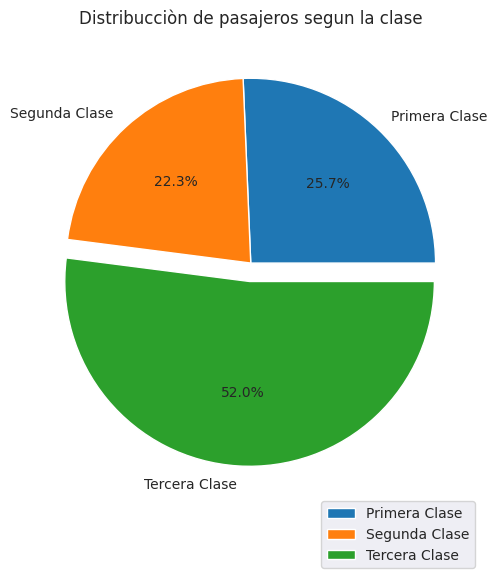

In [ ]:
# Gráfico de Distribucciòn de pasajeros según la clase
plt.figure(figsize=(10,6))
labels = ['Primera Clase','Segunda Clase','Tercera Clase']
sizes = [primera_clase,segunda_clase,tercera_clase]
explode = [0,0, 0.1]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode)
plt.title('Distribucciòn de pasajeros segun la clase')
plt.legend(bbox_to_anchor = (1,0))
plt.show()

In [ ]:
# Pasajeros segun la sexo
masculino = (df['Sex'] == 'female').sum()
femenino = (df['Sex'] == 'male').sum()
print(masculino)
print(femenino)

152
265


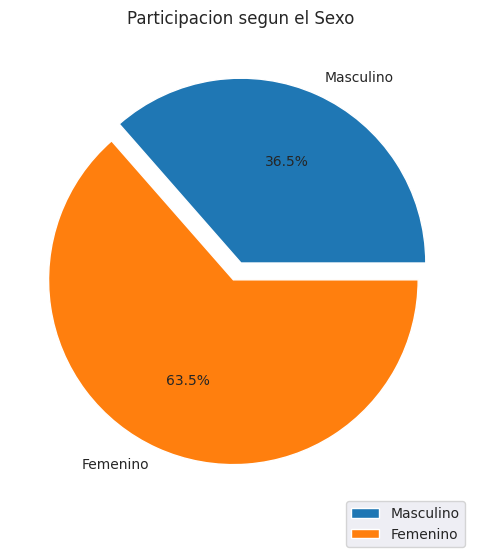

In [ ]:
# Grafico Participacion según el Sexo
plt.figure(figsize=(10,6))
labels = ['Masculino','Femenino']
sizes = [masculino,femenino]
explode = [0, 0.1]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode)
plt.title('Participacion segun el Sexo')
plt.legend(bbox_to_anchor = (1,0))
plt.show()

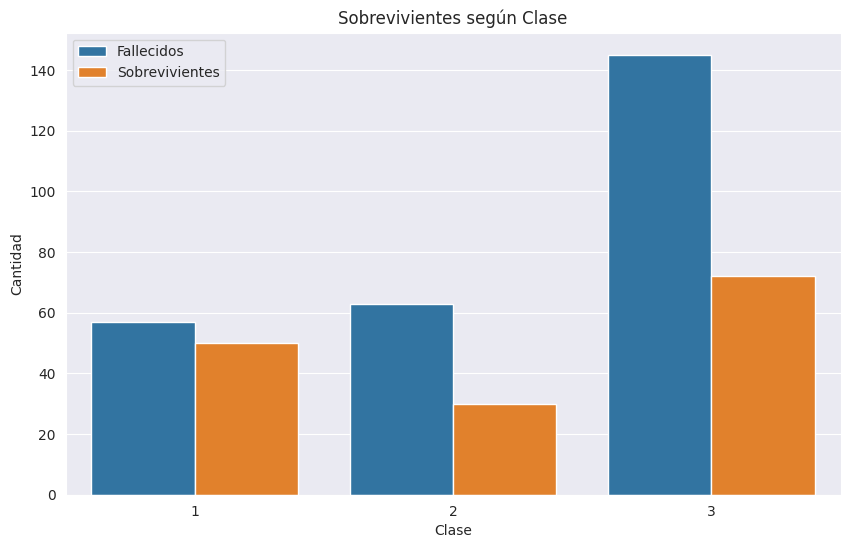

In [ ]:
# Sobrevivientes según Clase
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Sobrevivientes según Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(['Fallecidos', 'Sobrevivientes'])

# Método correcto para mostrar el gráfico
plt.show()

In [ ]:
# Grafico cruzando datos, info de sexo, supervivencia y clase.
pd.crosstab ([ df['Sex'], df['Survived']], df['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

,Pclass,1,2,3,All
Sex,Survived,,,,
female,1,50,30,72,152
male,0,57,63,145,265
All,,107,93,217,417


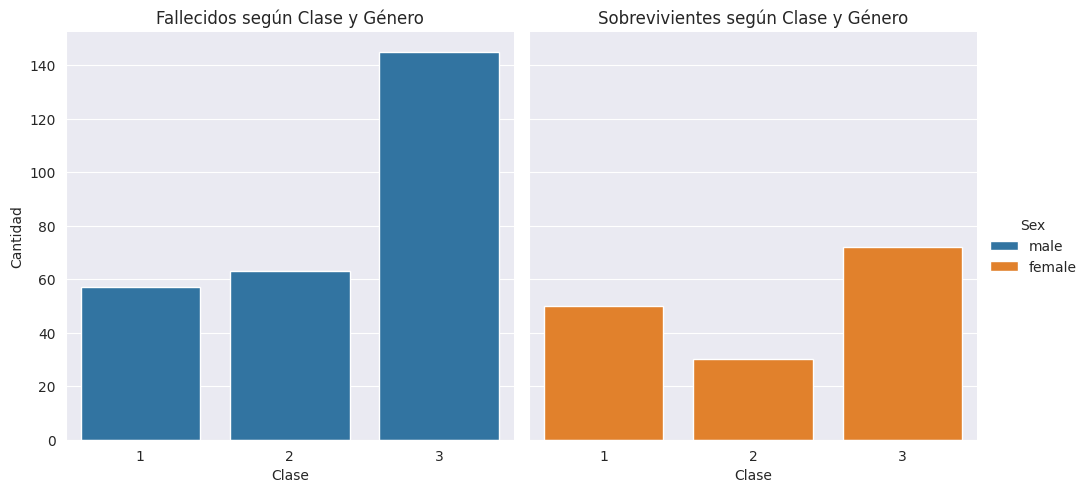

In [ ]:
# Creamos dos subgráficos que desglosan la cantidad de fallecidos y sobrevivientes del Titanic según la clase y el género.
sns.set_style("darkgrid")

# Creamos el gráfico de barras
g = sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count', height=5, aspect=1)

# Ponemos títulos para cada subplot
g.set_axis_labels("Clase", "Cantidad")
g.set_titles(col_template="{col_name}")

# Ajustamos los títulos de las columnas
for ax, title in zip(g.axes.flat, ["Fallecidos según Clase y Género", "Sobrevivientes según Clase y Género"]):
    ax.set_title(title)

# Mostramos el gráfico
plt.show()

In [ ]:
# Filtro por Sexo
df.Sex == 'female'

0      False
1       True
2      False
3      False
4       True
       ...  
413    False
414     True
415    False
416    False
417    False
Name: Sex, Length: 417, dtype: bool

In [ ]:
# Filtro por Sexo, mujeres count
mujeres = df[df.Sex == 'female'].count()
mujeres

PassengerId    152
Survived       152
Pclass         152
Name           152
Sex            152
Age            152
SibSp          152
Parch          152
Ticket         152
Fare           152
Embarked       152
dtype: int64

In [ ]:
# Filtro por Sexo Hombres count
hombres = df[df.Sex == 'male'].count()
hombres

PassengerId    265
Survived       265
Pclass         265
Name           265
Sex            265
Age            265
SibSp          265
Parch          265
Ticket         265
Fare           265
Embarked       265
dtype: int64

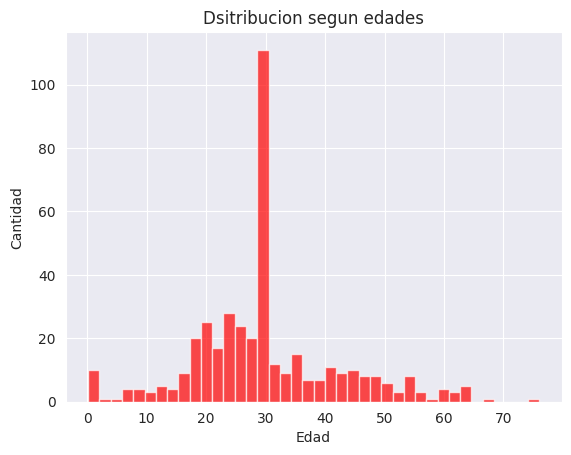

In [ ]:
# Grafico de distribución de los pasajeros por edad.
df.hist(column='Age', bins = 40, color = 'red', alpha = 0.7)
plt.title('Dsitribucion segun edades')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Edad Minima
df.Age.min()

0.17

In [ ]:
# Edad Maxima
df.Age.max()

76.0

In [ ]:
# Edad filtrada por sexo
df.Age[df.Sex == 'male']

0      34.5
2      62.0
3      27.0
5      14.0
7      26.0
       ... 
407    50.0
413    30.0
415    38.5
416    30.0
417    30.0
Name: Age, Length: 265, dtype: float64

In [ ]:
# Promedio de edad filtrada por sexo : Masculino
df.Age[df.Sex == 'male'].mean()

30.09588679245283

In [ ]:
# Promedio de edad filtrada por sexo : femenino
df.Age[df.Sex == 'female'].mean()

30.227565789473687

In [ ]:
# Contar mayores de edad  > 18
df[(df.Age  > 18)].count()

PassengerId    363
Survived       363
Pclass         363
Name           363
Sex            363
Age            363
SibSp          363
Parch          363
Ticket         363
Fare           363
Embarked       363
dtype: int64

In [ ]:
df[df.Age < 18].count()

PassengerId    41
Survived       41
Pclass         41
Name           41
Sex            41
Age            41
SibSp          41
Parch          41
Ticket         41
Fare           41
Embarked       41
dtype: int64

In [ ]:
# Total Pasajeros
pasajeros = df.Survived.count()
pasajeros

417

In [ ]:
# Total Sobrevivientes
sobrevivientes = df.Survived.sum()
sobrevivientes

152

In [ ]:
# Total Fallecidos
fallecidos = pasajeros-sobrevivientes
fallecidos

265

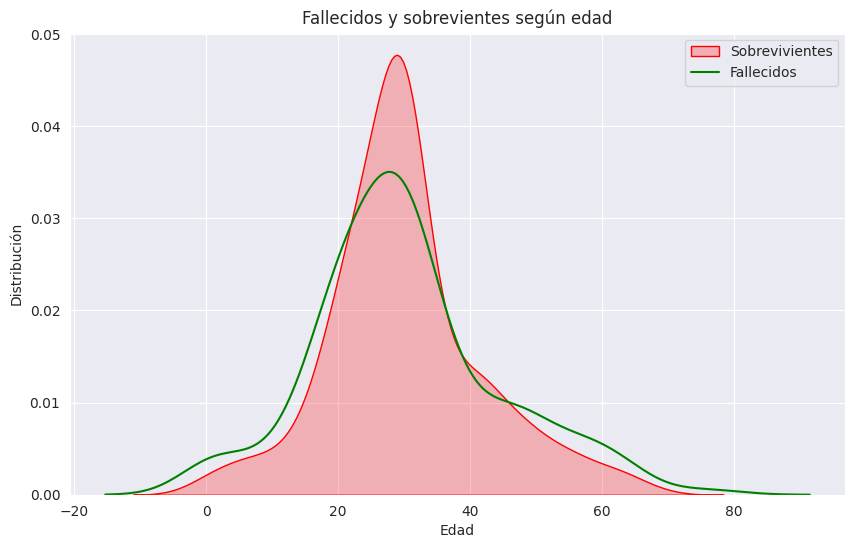

In [ ]:
# Gráfico de distribución de fallecimientos y sobrevivientes según edad.
plt.figure(figsize=(10,6))

axs = sns.kdeplot(df.Age[df.Survived ==0], fill = True, color = 'red', label = 'Fallecidos')
axs = sns.kdeplot(df.Age[df.Survived ==1], color = 'Green', label = 'Sobrevivientes')

# Titulos de Graficos
plt.title('Fallecidos y sobrevientes según edad')
plt.xlabel('Edad')
plt.ylabel('Distribución')
plt.legend({'Fallecidos', 'Sobrevivientes'})

# Mostramos el gráfico
plt.show()

In [ ]:
# Porcentaje se sobrevivientes
round(df.Survived[df.Survived ==1].count() / df.Survived.count() * 100,2)

36.45

## Análisis según costo del Billete

In [ ]:
# Valores maximos y minimos por billetes
print('El billete más caro:', df['Fare'].max())
print('El billete más económico:', df['Fare'].min())

El billete más caro: 512.3292
El billete más económico: 0.0


In [ ]:
boletos_caros = ((df['Fare']> 500) & (df['Survived']== 1)).sum()
print('Cantidad de sobrevivientes con billetes mas caros:',boletos_caros )

Cantidad de sobrevivientes con billetes mas caros: 1


In [ ]:
# Ver la lista de sobreviviente que pago mas caro
df.loc[df['Fare']> 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C


## Análisis según Género de los supervivientes.

In [ ]:
# Sobreviveintes por Género
df[(df.Sex == 'female') & (df.Survived ==1)].count()

PassengerId    152
Survived       152
Pclass         152
Name           152
Sex            152
Age            152
SibSp          152
Parch          152
Ticket         152
Fare           152
Embarked       152
dtype: int64

In [ ]:
df[(df.Sex == 'male') & (df.Survived ==1)].count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Guardamos en una variable el total de pasajeros mujeres.
total_mujeres = df.Survived[(df.Sex == 'female')].count()
print ('Total de pasajeros mujeres:', total_mujeres)

# Guardamos el total de mujeres sobrevivientes.
sobrevivientes_mujeres = df.Survived [(df.Sex == 'female') & (df.Survived == 1)].count()
print('Total de mujeres sobrevivientes:', sobrevivientes_mujeres)

# Mujeres muertas
muertes_mujeres = df.Survived [(df.Sex == 'female') & (df.Survived ==0)].count()
print('Total mujeres muertas:', muertes_mujeres)

# Porcentaje de mujeres sobrevivientes
total_mujeres_sobrevivientes = round(sobrevivientes_mujeres / total_mujeres * 100)
print('El total de mujeres sobrevivientes es del', total_mujeres_sobrevivientes,'%')

Total de pasajeros mujeres: 152
Total de mujeres sobrevivientes: 152
Total mujeres muertas: 0
El total de mujeres sobrevivientes es del 100 %


In [ ]:
# Guardamos en una variable el total de pasajeros hombres.
total_hombres = df.Survived[(df.Sex == 'male')].count()
print ('Total de pasajeros hombres:', total_hombres)

# Guardamos el total de mujeres sobrevivientes.
sobrevivientes_hombres = df.Survived [(df.Sex == 'male') & (df.Survived == 1)].count()
print('Total de hombres sobrevivientes:', sobrevivientes_hombres)

muertes_hombres = df.Survived [(df.Sex == 'male') & (df.Survived == 0)].count()
print('Total de hombres muertos:', muertes_hombres)

# Porcentaje de hombres sobrevivientes
total_mujeres_sobrevivientes = round(sobrevivientes_hombres / total_hombres * 100)
print('El total de hombres sobrevivientes es del', total_mujeres_sobrevivientes,'%')

Total de pasajeros hombres: 265
Total de hombres sobrevivientes: 0
Total de hombres muertos: 265
El total de hombres sobrevivientes es del 0 %


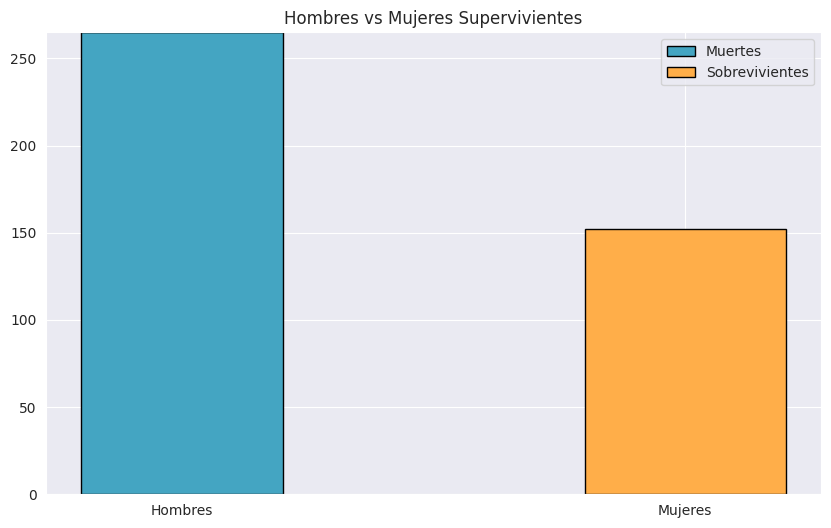

In [ ]:
# Grafico de barras representativo de muertes y fallecimientos según género

# Agregamos la figura
plt.figure(figsize=(10,6))
h_data = (muertes_hombres,sobrevivientes_hombres)
m_data = (muertes_mujeres,sobrevivientes_mujeres)

# Creamos la barras
p1 = plt.bar(np.arange(2), (h_data), width = 0.4, color = '#44a5c2', edgecolor = 'black', linewidth = 1)
p2 = plt.bar(np.arange(2), (m_data), bottom = h_data, width = 0.4, color = "#ffae49", edgecolor = "black", linewidth = 1)

# Agregamos Leyendas y Titulos al gráfico
plt.xticks(np.arange(2),['Hombres', 'Mujeres'])
plt.legend((p1[0],p2[0]), ('Muertes', 'Sobrevivientes'))
plt.title('Hombres vs Mujeres Supervivientes')
plt.show()

# Análisis por Edad
(Se agrupan las edad por rangos)

* 0 = Niños
* 1 = Jóvenes
* 2 = Adultos
* 3 = Adultos Mayores
* 4 = Mayores

In [ ]:
# Nueva columna de rango de edad

df ['rango_edad'] = 0
df.loc[ df['Age'] <= 16, 'rango_edad' ] = 0
df.loc[ (df['Age'] > 16) & (df['Age'] <= 32), 'rango_edad' ] = 1
df.loc[ (df['Age'] > 32) & (df['Age'] <= 48), 'rango_edad' ] = 2
df.loc[ (df['Age'] > 48) & (df['Age'] <= 64), 'rango_edad' ] = 3
df.loc[ df['Age'] > 64 ,'rango_edad' ] = 4

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,rango_edad
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,3
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [ ]:
# Cantidad de pasajeros segun la edad
df['rango_edad'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,count
rango_edad,
1,264
2,81
3,36
0,34
4,2


In [ ]:
# Tasa de supervivencia de los niños. Niños menores de 6 años
total_ninios = df.Age[(df.Age < 6)].count()
total_ninios

12

In [ ]:
# Niños menores de 6 años sobreviviente
total_sobrevivientes_ninios = df.Age[(df.Age < 6 ) & (df.Survived == 1)].count()
total_sobrevivientes_ninios

7

In [ ]:
df[(df.Age < 6) & (df.Survived == 0)].count()

PassengerId    5
Survived       5
Pclass         5
Name           5
Sex            5
Age            5
SibSp          5
Parch          5
Ticket         5
Fare           5
Embarked       5
rango_edad     5
dtype: int64

In [ ]:
# Porcentaje de sobrevientes niños
sobrevivientes_ninios = round(total_sobrevivientes_ninios / total_ninios * 100, 2)
sobrevivientes_ninios

58.33

## Análisis según zona de embarque

In [ ]:
# Agregamos una columan nueva de los nombres de embarque
df ['nombre_embaque'] = 0
df.loc[ df['Embarked'] == 'S', 'nombre_embaque' ] = 'Southampton'
df.loc[ (df['Embarked'] == 'Q'), 'nombre_embaque' ] = 'Queenstown'
df.loc[ (df['Embarked'] == 'C'), 'nombre_embaque' ] = 'Cherbourg'


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,rango_edad,nombre_embaque
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,2,Queenstown
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,Southampton
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,3,Queenstown
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Southampton
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,Southampton


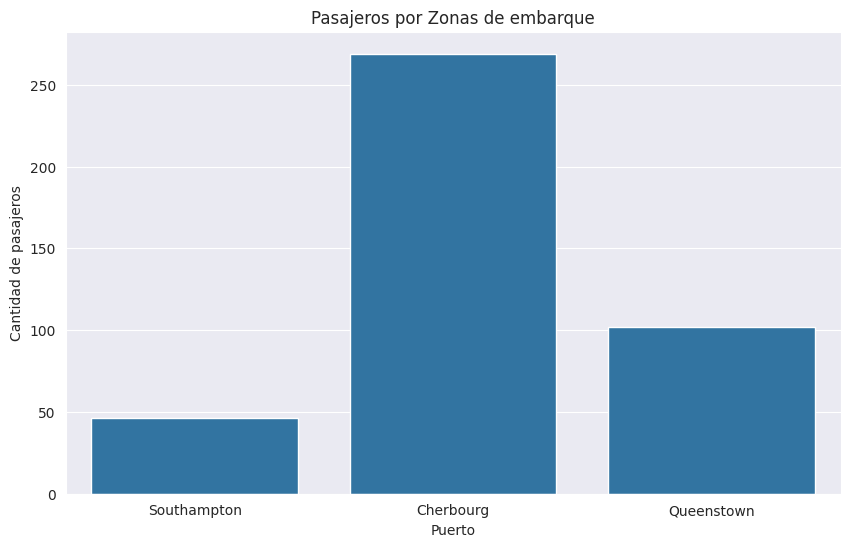

In [ ]:
# Grafico por Zona de embarques

plt.figure(figsize=(10,6))
sns.countplot(x = df['nombre_embaque'])

# Titualos y leyendas
plt.title('Pasajeros por Zonas de embarque')
plt.xlabel('Puerto')
plt.ylabel('Cantidad de pasajeros')

plt.xticks(np.arange(3),['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()

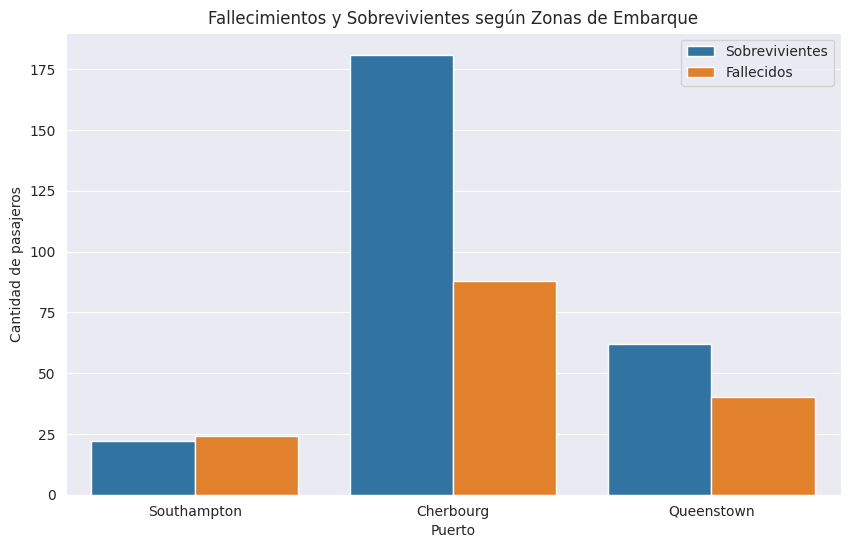

In [ ]:
# Sobrevivientes segun la Zona de embarque
plt.figure(figsize=(10,6))
sns.countplot(x = df['nombre_embaque'], hue = df ['Survived'])

# Colocamos Títulos y Leyendas
plt.title('Fallecimientos y Sobrevivientes según Zonas de Embarque')
plt.xlabel('Puerto')
plt.ylabel('Cantidad de pasajeros')

plt.xticks(np.arange(3),['Southampton', 'Cherbourg', 'Queenstown'])
plt.legend ({'Fallecidos', 'Sobrevivientes'})
plt.show()